In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('abathur.jpg')

In [4]:
a = np.array(img)

In [5]:
a.shape

(636, 1000, 3)

In [2]:
def img_reduction(image, factor):
    h = img.size[0]
    w = img.size[1]
    print("Original Shape : {}".format(np.array(img).shape))
    image_re = img.resize([h//factor, w//factor])
    print("Reducted Shape : {}".format(np.array(image_re).shape))
    return image_re

def img_reshape(x):
    return x.reshape(x.shape[0]*x.shape[1],x.shape[2])

def img_backshape(x, h, w):
    return x.reshape(h, w, 3)

In [3]:
img.size[0]

1000

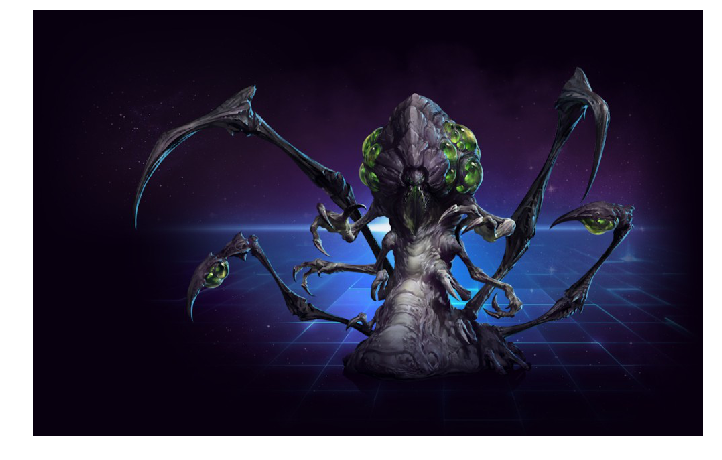

Shape : (636, 1000, 3)


In [4]:
plt.figure(figsize=(12,12))
plt.axis('off')
abathur = np.array(img)
plt.imshow(abathur)
plt.show()
print("Shape : {}".format(abathur.shape))

Original Shape : (636, 1000, 3)
Reducted Shape : (159, 250, 3)


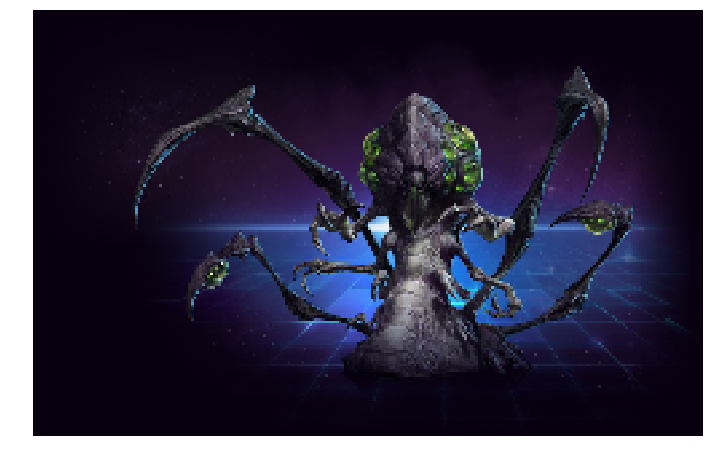

In [5]:
plt.figure(figsize=(12,12))
plt.axis('off')
abathur_re = img_reduction(img, 4)
abathur_re = np.array(abathur_re)
plt.imshow(abathur_re)
plt.show()

In [6]:
A = img_reshape(abathur_re)
A.shape

(39750, 3)

In [7]:
k = 6
centroid = np.array([np.linspace(5, 255, k),
                     np.linspace(5, 255, k),
                     np.linspace(5, 255, k)]).T
mu = centroid.copy()
y = np.zeros([A.shape[0],1])
d = np.zeros([k,1])
n_iter = 10

In [8]:
print(mu.shape)
print(y.shape)
print(d.shape)
print(A.shape)

(6, 3)
(39750, 1)
(6, 1)
(39750, 3)


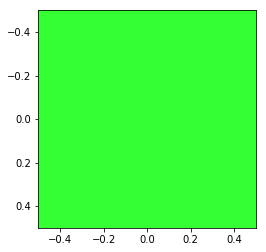

In [9]:
plt.imshow(np.array([[[51, 255 ,51]]]))
plt.show()

In [10]:
centroid[3] = np.array([51, 255 ,51])

In [11]:
mu = centroid.copy()
mu

array([[  5.,   5.,   5.],
       [ 55.,  55.,  55.],
       [105., 105., 105.],
       [ 51., 255.,  51.],
       [205., 205., 205.],
       [255., 255., 255.]])

In [12]:
for iteration in range(n_iter):
    for i in range(A.shape[0]):
        for j in range(k):
            d[j] = np.linalg.norm(A[i,:]-mu[j,:], 2)
        y[i] = np.argmin(d)
    
    err = 0
    for i in range(k):
        mu[i,:] = np.mean(A[np.where(y == i)[0]], axis=0)
        err += np.linalg.norm(centroid[i,:] - mu[i,:], 2)
    centroid = mu.copy()
    print("err : {}, iter : {}/{}".format(err, iteration+1, n_iter))

err : 290.63477917742057, iter : 1/10
err : 107.8161571320562, iter : 2/10
err : 83.32145918672582, iter : 3/10
err : 83.15669297436318, iter : 4/10
err : 64.89212905690724, iter : 5/10
err : 58.000383469097606, iter : 6/10
err : 35.40228107886729, iter : 7/10
err : 21.47379150466645, iter : 8/10
err : 14.106448302988648, iter : 9/10
err : 11.354191615171285, iter : 10/10


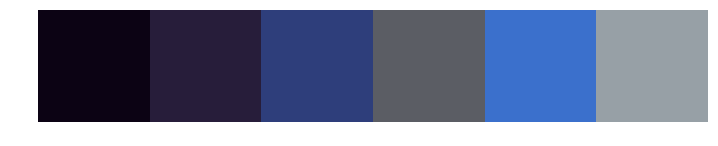

In [13]:
plt.figure(figsize=(12,6))
plt.imshow(mu.astype(int).reshape(1,6,3))
plt.axis('off')
plt.show()

In [14]:
mu_int = mu.astype(int)
for i in range(A.shape[0]):
    for j in range(k):
        d[j] = np.linalg.norm(A[i,:]-mu_int[j,:], 2)
    y[i] = np.argmin(d)
    A[i] = mu[int(y[i])]

In [15]:
A_back = img_backshape(A, 159, 250)

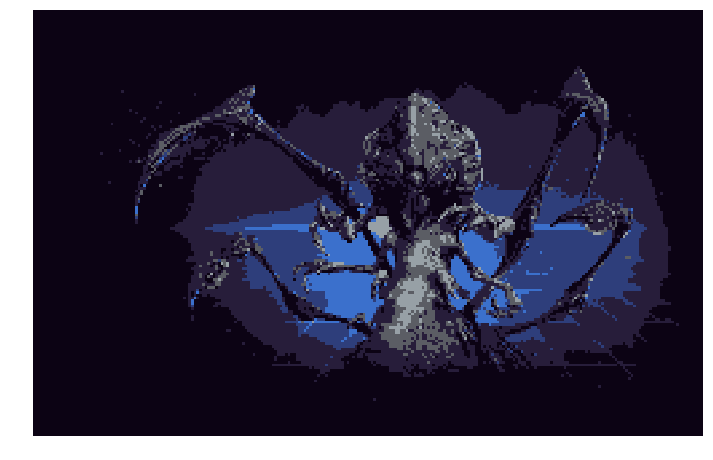

In [16]:
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(A_back)
plt.show()

Original Shape : (636, 1000, 3)
Reducted Shape : (159, 250, 3)


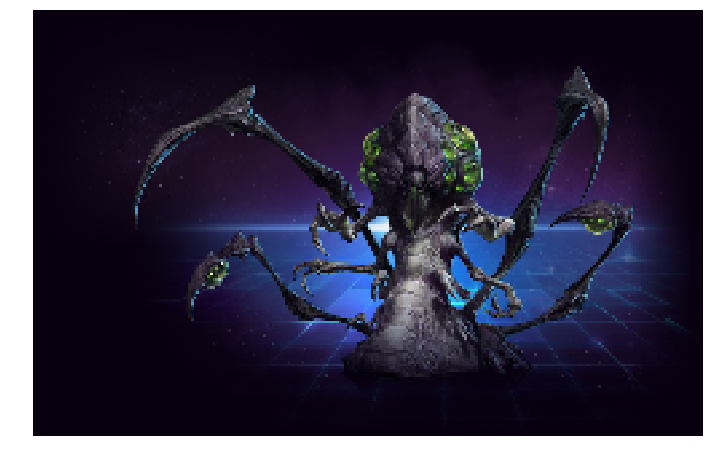

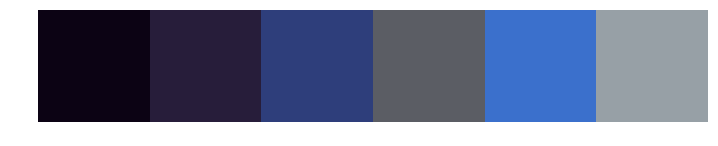

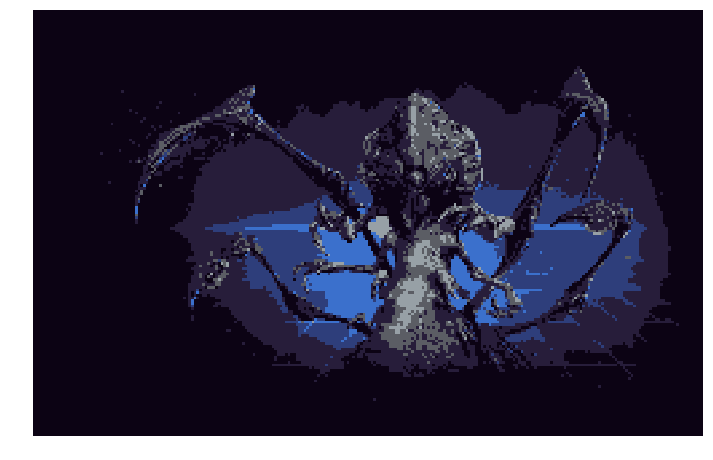

In [17]:
plt.figure(figsize=(12,12))
plt.axis('off')
abathur_re = img_reduction(img, 4)
abathur_re = np.array(abathur_re)
plt.imshow(abathur_re)
plt.show()

plt.figure(figsize=(12,6))
plt.imshow(mu.astype(int).reshape(1,6,3))
plt.axis('off')
plt.show()

plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(A_back)
plt.show()